# Trabalho 2
---

## Especificações

O trabalho deve ser relizado em **duplas**.

### Entrega

Após responder todas as questões, vocês devem certificar que seu Notebook está salvo com suas alterações (basta pressionar `ctrl + s` para salvar). Após salvar suas alterações, vocês devem realizar a entrega na sala de entrega do Moodle. A entrega deve ser feita da seguinte maneira:
- Deve ser entregue um arquivo `zip` contendo este Notebook com as questões respondidas. O nome do arquivo deve seguir o padrão: `NomeSobrenome_NomeSobrenome.zip`
- **Apenas um aluno da dupla deve fazer a entrega.**


### Critérios de avaliação

Cada questão será avaliada de acordo com os seguintes critérios:
- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

---

## Enunciado

Este trabalho consiste em explorar um conjunto de dados de Doenças crônicas nos rins (arquivo `kindey_disease.csv`). O conjunto de dados é formado por 400 observações (instâncias) e contém o seguintes atributos:

|Atributo|Tipo|Categorias|Descrição|
|:--|:--|:--|:--|
|`id`|Numérico (Único)|-|Unique identifier|
|`age`|Numérico|-|Age, in years|
|`bp`|Numérico|-|Blood pressure (mm/Hg)|
|`sg`|Categórico|1.005, 1.010, 1.015, 1.020, 1.025|Specific Gravity|
|`al`|Categórico|0, 1, 2, 3, 4, 5|Albumin|
|`su`|Categórico|0, 1, 2, 3, 4, 5|Sugar|
|`rbc`|Categórico|normal, abnormal|Red blood cells|
|`pc`|Categórico|normal, abnormal|Pus cell|
|`pcc`|Categórico|present, notpresent|Pus cell clumps|
|`ba`|Categórico|present, notpresent|Bacteria|
|`bgr`|Numérico|-|Blood glucose random (mgs/dl)|
|`bu`|Numérico|-|Blood urea (mgs/dl)|
|`sc`|Numérico|-|Serum Creatinine (mgs/dl)|
|`sod`|Numérico|-|Sodium (mEq/L)|
|`pot`|Numérico|-|Potassium (mEq/L)|
|`hemo`|Numérico|-|Hemoglobin (gms)|
|`pcv`|Numérico|-|Packed cell volume|
|`wc`|Numérico|-|White blood cell count (cells/cmm)|
|`rc`|Numérico|-|Red blood cell count (millions/cmm)|
|`htn`|Categórico|yes, no|Hypertension|
|`dm`|Categórico|yes, no|Diabetes Mellitus|
|`cad`|Categórico|yes, no|Coronary artery disease|
|`appet`|Categórico|good, poor|Appetite|
|`pe`|Categórico|yes, no|Pedal edema|
|`ane`|Categórico|yes, no|Anemia|
|`classification`|Categórico|ckd, notckd|Classification|


Nas células abaixo, existem questões específicas sobre o conjunto de dados que devem ser respondidas.

**Não é permitido importar nenhum módulo além dos que estão importados na célula abaixo.**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display as print_dataframe

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Questão 1 (3.0 pts)

Leia o arquivo `kidney_disease.csv` e realize as seguintes operações de limpeza de dados:
1. Remova as colunas `id` e `sg`.
1. Remova todas as instâncias do conjunto de dados onde o o valor da coluna `rbc` estiver vazio.
1. Renomeie as colunas, de forma a deixar mais claro o que cada coluna significa (e.g., renomear `bp` para `blood_pressure`). Se baseie nas informações sobre os atributos, disponibilizadas acima.
1. Imprima o número de valores faltantes para **cada um** dos atributos. Estes valores devem estar em **percentual** e devem estar ordenados de maneira **decrescente**.
1. Preencha os valores faltantes dos atributos **numéricos** com a **média** da respectiva coluna.
1. Preencha os valores faltantes dos atributos **categóricos** com a **moda** (elemento mais frequente) da respectiva coluna.

In [3]:
########################
# Inicio do seu codigo #
########################

df = pd.read_csv('kidney_disease.csv')

#1
df = df.drop(columns=['id', 'sg'])

#2
df = df.dropna(subset=['rbc'])

#3
df = df.rename(columns={'age': 'age_in_years', 'bp':'blood_pressure', 'al':'albumin', 'su':'sugar', 'rbc':'red_blood_cells',
                        'pc':'pus_cell', 'pcc':'pus_cell_clumps', 'ba':'bacteria', 'bgr':'blood_glucose_random',
                        'bu':'blood_urea', 'sc':'serum_creatinine', 'sod':'sodium', 'pot':'potassium', 'hemo':'hemoglobin',
                        'pcv':'packed_cell_volume', 'wc':'white_blood_cell_count', 'rc':'red_blood_cell_count',
                        'htn':'hypertension', 'dm':'diabetes_mellitus', 'cad':'coronary_artery_disease', 'appet':'appetite',
                        'pe':'pedal_edema', 'ane':'anemia', 'classification':'classification'})

#4
percentual_faltante = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
for atributo, percentual in zip(percentual_faltante.index, percentual_faltante):
    print('{:.4f}% dos valores do atributo {} são faltantes'.format(percentual, atributo))

#5
atributos_numericos = ['age_in_years', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
                       'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
                       'red_blood_cell_count']

df[atributos_numericos] = df[atributos_numericos].fillna(df[atributos_numericos].mean())

#6
atributos_categoricos = ['albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
                         'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
                         'classification']

df[atributos_categoricos] = df[atributos_categoricos].fillna(df[atributos_categoricos].mode(dropna=True).iloc[0])

########################
#   Fim do seu codigo  #
########################

19.7581% dos valores do atributo red_blood_cell_count são faltantes
15.3226% dos valores do atributo white_blood_cell_count são faltantes
13.3065% dos valores do atributo sodium são faltantes
13.3065% dos valores do atributo potassium são faltantes
9.2742% dos valores do atributo blood_glucose_random são faltantes
9.2742% dos valores do atributo packed_cell_volume são faltantes
8.8710% dos valores do atributo hemoglobin são faltantes
5.2419% dos valores do atributo blood_urea são faltantes
4.0323% dos valores do atributo serum_creatinine são faltantes
3.6290% dos valores do atributo pus_cell são faltantes
2.8226% dos valores do atributo blood_pressure são faltantes
1.6129% dos valores do atributo age_in_years são faltantes
1.2097% dos valores do atributo bacteria são faltantes
1.2097% dos valores do atributo pus_cell_clumps são faltantes
1.2097% dos valores do atributo sugar são faltantes
1.2097% dos valores do atributo albumin são faltantes
0.8065% dos valores do atributo hypertension

## Questão 2 (1.5 pts)

Enunciado

Realize as seguintes operações de visualização de dados:
1. Plote um gráfico de barra para o atributo diabetes (nome original: `dm`).
1. Plote um gráfico de dispersão com o atributo idade (nome original: `age`) no eixo X e o atributo hemoglobina (nome original: `hemo`) no eixo Y.
1. Plote um gráfico de histograma para o atributo "blood urea" (nome original: `bu`) **somente** para as instâncias onde `age` está entre 30 e 60.

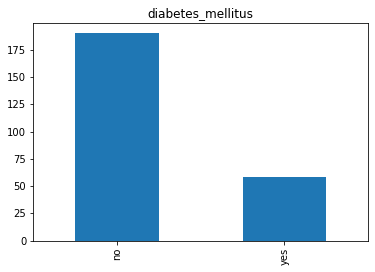

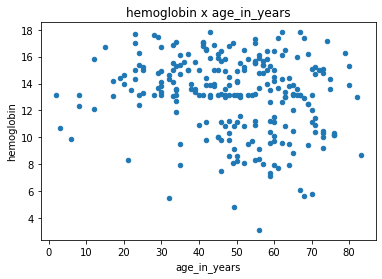

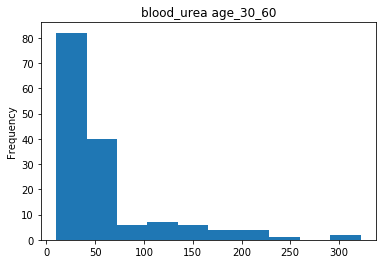

In [4]:
########################
# Inicio do seu codigo #
########################

#1
df['diabetes_mellitus'].value_counts().plot.bar(title='diabetes_mellitus')
plt.show()

#2
df.plot.scatter(x='age_in_years', y='hemoglobin', title='hemoglobin x age_in_years')
plt.show()

#3
df['blood_urea'][(df['age_in_years'] >= 30) & (df['age_in_years'] <= 60)].plot.hist(title='blood_urea age_30_60')
plt.show()

########################
#   Fim do seu codigo  #
########################

## Questão 3 (2.5 pts)

Enunciado

Responda às seguintes perguntas sobre o conjunto de dados:
1. Quantas pessoas possuem pressão sanguínea (nome original: `bp`) entre 80 e 90 e apetite ruim (nome original: `appet`)?
1. Quantas pessoas com idade (nome original: `age`) igual ou maior que 40 possuem doença (nome original: `classification`)?
1. Qual a idade média das pessoas com anemia (nome original: `ane`) e com contagem de glóbulos brancos (nome original: `wc`) maior ou igual a 12.000?
1. Quantas pessoas com hipertensão (nome original: `htn`) possuem uma contagem de glóbulos vermelhos (nome original: `rbc`) normal?
1. Qual a média dos atributos blood urea (nome original: `bu`) , sodium (nome original: `sod`) e potassium (nome original: `pot`), para pessoas **com e sem** doença arterial coronária (nome original: `cad`)?

In [5]:
########################
# Inicio do seu codigo #
########################

#1
bp_8090_poor_appet = (((df['blood_pressure'] >= 80) & (df['blood_pressure'] <= 90)) & (df['appetite'] == 'poor')).sum()
print('{} pessoas possuem pressão sanguínea entre 80 e 90 e apetite ruim\n'.format(bp_8090_poor_appet))

#2
age_40_ckd = ((df['age_in_years'] >= 40) & (df['classification'] == 'ckd')).sum()
print('{} pessoas com idade igual ou maior que 40 possuem doença\n'.format(age_40_ckd))

#3
mask1 = (df['anemia'] == 'yes') & (df['white_blood_cell_count'] >= 12000)
idade_media = df['age_in_years'][mask1].mean()
print('{} é a idade média das pessoas com anemia e com contagem de glóbulos brancos maior ou igual a 12.000\n'
      .format(idade_media))

#4
htn_rbc_normal = ((df['hypertension'] == 'yes') & (df['red_blood_cells'] == 'normal')).sum()
print('{} pessoas com hipertensão possuem uma contagem de glóbulos vermelhos normal\n'.format(htn_rbc_normal))

#5
com = df['coronary_artery_disease'] == 'yes'
sem = df['coronary_artery_disease'] == 'no'

blood_urea_c, sodium_c, potassium_c = df['blood_urea'][com].mean(), df['sodium'][com].mean(), df['potassium'][com].mean()
blood_urea_s, sodium_s, potassium_s = df['blood_urea'][sem].mean(), df['sodium'][sem].mean(), df['potassium'][sem].mean()

print('Para pessoas com doença arterial coronária:\n\
- A média do atributo blood urea é {} \n\
- A média do atributo sodium é {}\n\
- A média do atributo potassium é {}\n'.format(blood_urea_c, sodium_c, potassium_c))

print('Para pessoas sem doença arterial coronária:\n\
- A média do atributo blood urea é {} \n\
- A média do atributo sodium é {}\n\
- A média do atributo potassium é {}\n'.format(blood_urea_s, sodium_s, potassium_s))

########################
#   Fim do seu codigo  #
########################

17 pessoas possuem pressão sanguínea entre 80 e 90 e apetite ruim

91 pessoas com idade igual ou maior que 40 possuem doença

56.44444444444444 é a idade média das pessoas com anemia e com contagem de glóbulos brancos maior ou igual a 12.000

41 pessoas com hipertensão possuem uma contagem de glóbulos vermelhos normal

Para pessoas com doença arterial coronária:
- A média do atributo blood urea é 111.2052816020025 
- A média do atributo sodium é 133.1469220246238
- A média do atributo potassium é 4.590615595075239

Para pessoas sem doença arterial coronária:
- A média do atributo blood urea é 53.966136133370156 
- A média do atributo sodium é 138.8914527333132
- A média do atributo potassium é 4.751493003120911



## Questão 4 (3.0 pts)

Realize as seguintes operações para treinar um modelo de classificação:
1. Substitua os valores das variáveis categóricas para valores numéricos da seguinte forma:

|Atributo(s)|Substituições|
|:--|:--|
|`htn`, `dm`, `cad`, `pe`, `ane`|`no`: 0<br>`yes`: 1|
|`rbc`, `pc`|`normal`: 0<br>`abnormal`: 1|
|`pcc`, `ba`|`notpresent`: 0<br>`present`: 1|
|`appet`|`poor`: 0<br>`good`: 1|
|`classification`|`notckd`: 0<br>`ckd`: 1|

2. Separe as colunas dos atributos (features) da coluna de anotação (label)
1. Separe o conjunto de dados em conjuntos de treino e teste, usando uma proporção de 70% para treino e 30% para teste.
1. Normalize os atributos utilizando a estratégia `MinMaxScaler` do Scikit-Learn (não se esqueça de normalizar os dados de teste também!).
1. Treine um modelo de classificação k-NN, com `k=5`.
1. Avalie o desempenho do modelo utilizando os dados de teste e a medida `accuracy_score`.

In [6]:
########################
# Inicio do seu codigo #
########################

#1
atributos_cat_num = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus',
                     'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']

df[atributos_cat_num] = df[atributos_cat_num].replace(to_replace={'no':0, 'yes':1, 'normal':0, 'abnormal':1, 'notpresent':0,
                                                                  'present':1, 'poor':0, 'good':1, 'notckd':0, 'ckd':1})

#2
df_features = df.drop(columns=['classification'])
df_label = df['classification']

#3
x_train, x_test, y_train, y_test = train_test_split(df_features, df_label, train_size=0.7)

#4
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#5
k = 5
classifier = KNeighborsClassifier(k)
classifier.fit(x_train, y_train)

#6
preds = classifier.predict(x_test)
acc = accuracy_score(y_test, preds, normalize=True)
print('Acurácia: {:.2f}%'.format(acc*100))

########################
#   Fim do seu codigo  #
########################

Acurácia: 97.33%


## Questão 5 - Bônus (1.0 pts)

Dado o processamento realizado na questão anterior, treine um conjunto de modelos de classificação k-NN com `k` variando de 1 a 25 (de 1 em 1) e avalie os desempenhos dos modelos utilizando as métricas `accuracy_score` e `f1_score`. Em seguida, realize a plotagem dos valores destas métricas como um gráfico de linha (ambas as métricas no mesmo gráfico, eixo X representando valores de `k` e eixo Y representando os valores das métricas).

Treinando com k igual a 1:
Acurácia: 100.00%
F1-Score: 100.00%

Treinando com k igual a 2:
Acurácia: 97.33%
F1-Score: 96.30%

Treinando com k igual a 3:
Acurácia: 97.33%
F1-Score: 96.30%

Treinando com k igual a 4:
Acurácia: 97.33%
F1-Score: 96.30%

Treinando com k igual a 5:
Acurácia: 97.33%
F1-Score: 96.30%

Treinando com k igual a 6:
Acurácia: 97.33%
F1-Score: 96.30%

Treinando com k igual a 7:
Acurácia: 97.33%
F1-Score: 96.30%

Treinando com k igual a 8:
Acurácia: 96.00%
F1-Score: 94.34%

Treinando com k igual a 9:
Acurácia: 96.00%
F1-Score: 94.34%

Treinando com k igual a 10:
Acurácia: 94.67%
F1-Score: 92.31%

Treinando com k igual a 11:
Acurácia: 94.67%
F1-Score: 92.31%

Treinando com k igual a 12:
Acurácia: 94.67%
F1-Score: 92.31%

Treinando com k igual a 13:
Acurácia: 94.67%
F1-Score: 92.31%

Treinando com k igual a 14:
Acurácia: 93.33%
F1-Score: 90.20%

Treinando com k igual a 15:
Acurácia: 93.33%
F1-Score: 90.20%

Treinando com k igual a 16:
Acurácia: 93.33%
F1-Score: 90.20%


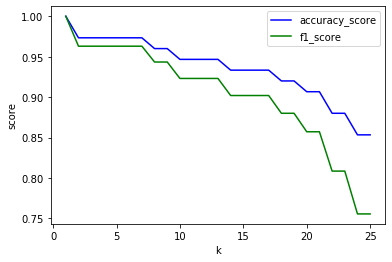

In [7]:
########################
# Inicio do seu codigo #
########################
acc_array =[]
f1_array = []
range_array = [x for x in range(1, 26)]

for k in range_array:
    print('Treinando com k igual a {}:'.format(k))
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)

    preds = classifier.predict(x_test)
    acc = accuracy_score(y_test, preds, normalize=True)
    f1 = f1_score(y_test, preds)
    print('Acurácia: {:.2f}%'.format(acc*100))
    print('F1-Score: {:.2f}%'.format(f1*100))
    acc_array.append(acc)
    f1_array.append(f1)
    print()

fig, ax = plt.subplots()

ax.plot(range_array, acc_array, label='accuracy_score', color='blue')
ax.plot(range_array, f1_array, label='f1_score', color='green')
ax.set_xlabel('k')
ax.set_ylabel('score')
ax.legend()

plt.show()

########################
#   Fim do seu codigo  #
########################